<div style="text-align: center; font-family: 'Times New Roman', Times, serif; font-size: 22px;">
Final Project
</div>

<div style="text-align: center; font-family: 'Times New Roman', Times, serif; font-size: 14px; margin-top: 8px;">
February 10, 2026
</div>

<div style="font-family: 'Times New Roman', Times, serif; font-size: 18px; font-weight: bold; margin-top: 28px;">
1&nbsp;&nbsp;Condition Monitoring of Hydraulic Systems: Data Processing & Exploratory Analysis
</div>

<div style="font-family: 'Times New Roman', Times, serif; font-size: 16px; font-weight: bold; margin-top: 18px;">
1.1&nbsp;&nbsp;Step 1: Import Libraries & Inspect Raw Sensor Data
</div>

In [7]:
# Import Libraries & Set Data Path

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Path to raw sensor data
DATA_PATH = "condition+monitoring+hydraulic+systems"

<div style="font-family: 'Times New Roman', Times, serif; font-size: 16px; font-weight: bold; margin-top: 18px;">
1.2&nbsp;&nbsp;Overview of Available Sensor Files
</div>

In [9]:
# Inspect available sensor files
files = sorted(os.listdir(DATA_PATH))
files

['.DS_Store',
 '.ipynb_checkpoints',
 'CE.txt',
 'CP.txt',
 'EPS1.txt',
 'FS1.txt',
 'FS2.txt',
 'PS1.txt',
 'PS2.txt',
 'PS3.txt',
 'PS4.txt',
 'PS5.txt',
 'PS6.txt',
 'SE.txt',
 'TS1.txt',
 'TS2.txt',
 'TS3.txt',
 'TS4.txt',
 'VS1.txt',
 'description.txt',
 'documentation.txt',
 'profile.txt']

<div style="font-family: 'Times New Roman', Times, serif; font-size: 16px; font-weight: bold; margin-top: 18px;">
1.3&nbsp;&nbsp;Inspect Structure of Individual Sensor Files
</div>

In [14]:
# Reload using tab delimiter
df_sample = pd.read_csv(sample_path, sep="\t", header=None)
df_sample.head()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,47.202,47.273,47.250,47.332,47.213,47.372,47.273,47.438,46.691,46.599,...,31.554,30.953,30.639,30.561,30.368,30.224,29.790,29.261,29.287,28.866
1,29.208,28.822,28.805,28.922,28.591,28.643,28.216,27.812,27.514,27.481,...,23.995,24.328,24.283,23.877,23.816,23.933,23.354,23.483,23.320,23.588
2,23.554,23.521,23.527,23.008,23.042,23.052,22.658,22.952,22.908,22.359,...,21.711,21.564,21.564,21.526,21.753,21.749,21.802,21.582,21.283,21.519
3,21.540,21.419,21.565,20.857,21.052,21.039,20.926,20.912,20.989,20.882,...,20.687,20.703,20.295,20.482,20.600,20.547,20.708,20.708,20.574,20.403
4,20.460,20.298,20.350,19.867,19.997,19.972,19.924,19.813,19.691,19.634,...,19.887,19.919,19.696,19.634,19.747,20.005,19.919,19.736,19.977,20.016


In [15]:
df_sample.shape
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 60 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       2205 non-null   float64
 1   1       2205 non-null   float64
 2   2       2205 non-null   float64
 3   3       2205 non-null   float64
 4   4       2205 non-null   float64
 5   5       2205 non-null   float64
 6   6       2205 non-null   float64
 7   7       2205 non-null   float64
 8   8       2205 non-null   float64
 9   9       2205 non-null   float64
 10  10      2205 non-null   float64
 11  11      2205 non-null   float64
 12  12      2205 non-null   float64
 13  13      2205 non-null   float64
 14  14      2205 non-null   float64
 15  15      2205 non-null   float64
 16  16      2205 non-null   float64
 17  17      2205 non-null   float64
 18  18      2205 non-null   float64
 19  19      2205 non-null   float64
 20  20      2205 non-null   float64
 21  21      2205 non-null   float64
 22  

<div style="font-family: 'Times New Roman', Times, serif; font-size: 16px; font-weight: bold; margin-top: 18px;">
1.4&nbsp;&nbsp;Load All Sensor Files and Combine into One DataFrame
</div>

In [20]:
# Re-load sensor files cleanly (tab-delimited) and force 60 columns

import os
import pandas as pd

SENSOR_PREFIXES = ("CE", "CP", "EPS", "FS", "PS", "SE", "TS", "VS")

sensor_files = sorted([
    f for f in os.listdir(DATA_PATH)
    if f.endswith(".txt")
    and f.startswith(SENSOR_PREFIXES)
    and os.path.isfile(os.path.join(DATA_PATH, f))
])

EXPECTED_COLS = 60

dfs = []
bad_files = []

for fname in sensor_files:
    fpath = os.path.join(DATA_PATH, fname)

    try:
        df = pd.read_csv(
            fpath,
            sep="\t",              # IMPORTANT: tab delimiter
            header=None,
            engine="python",       # more forgiving parser
            encoding="latin1"      # avoids unicode decode issues
        )
    except Exception as e:
        bad_files.append((fname, str(e)))
        continue

    # Drop completely empty columns (sometimes happen from trailing tabs)
    df = df.dropna(axis=1, how="all")

    # Force exactly 60 columns (keep first 60 if extra)
    if df.shape[1] >= EXPECTED_COLS:
        df = df.iloc[:, :EXPECTED_COLS]
    else:
        # if fewer than 60, pad with NaN (rare, but keeps shape consistent)
        for c in range(df.shape[1], EXPECTED_COLS):
            df[c] = pd.NA
        df = df.iloc[:, :EXPECTED_COLS]

    df["sensor_file"] = fname.replace(".txt", "")
    dfs.append(df)

df_all = pd.concat(dfs, ignore_index=True)

print("Sensor files found:", sensor_files)
print("Combined shape:", df_all.shape)
print("Unique sensor files:", df_all["sensor_file"].nunique())
print("Bad files:", bad_files)

df_all.head()

Sensor files found: ['CE.txt', 'CP.txt', 'EPS1.txt', 'FS1.txt', 'FS2.txt', 'PS1.txt', 'PS2.txt', 'PS3.txt', 'PS4.txt', 'PS5.txt', 'PS6.txt', 'SE.txt', 'TS1.txt', 'TS2.txt', 'TS3.txt', 'TS4.txt', 'VS1.txt']
Combined shape: (37485, 61)
Unique sensor files: 17
Bad files: []


,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,sensor_file
0,47.202,47.273,47.250,47.332,47.213,47.372,47.273,47.438,46.691,46.599,...,30.953,30.639,30.561,30.368,30.224,29.790,29.261,29.287,28.866,CE
1,29.208,28.822,28.805,28.922,28.591,28.643,28.216,27.812,27.514,27.481,...,24.328,24.283,23.877,23.816,23.933,23.354,23.483,23.320,23.588,CE
2,23.554,23.521,23.527,23.008,23.042,23.052,22.658,22.952,22.908,22.359,...,21.564,21.564,21.526,21.753,21.749,21.802,21.582,21.283,21.519,CE
3,21.540,21.419,21.565,20.857,21.052,21.039,20.926,20.912,20.989,20.882,...,20.703,20.295,20.482,20.600,20.547,20.708,20.708,20.574,20.403,CE
4,20.460,20.298,20.350,19.867,19.997,19.972,19.924,19.813,19.691,19.634,...,19.919,19.696,19.634,19.747,20.005,19.919,19.736,19.977,20.016,CE


In [21]:
# sanity checks
print(df_all["sensor_file"].value_counts().head())
print("Any nulls?", df_all.isna().sum().sum())
print("Number of columns (should be consistent across sensors):", df_all.shape[1])

sensor_file
CE     2205
PS5    2205
TS4    2205
TS3    2205
TS2    2205
Name: count, dtype: int64
Any nulls? 0
Number of columns (should be consistent across sensors): 61


<div style="font-family: 'Times New Roman', Times, serif; font-size: 16px; font-weight: bold; margin-top: 18px;">
1.4.1&nbsp;&nbsp;Standardize Column Structure and Validate Consistency
</div>

In [23]:
# 1.4.1 Standardize Column Structure and Validate Consistency

# Rename signal columns (0–59) -> t0–t59
signal_cols = list(range(60))
rename_map = {i: f"t{i}" for i in signal_cols}
df_all = df_all.rename(columns=rename_map)

# Ensure signal values are numeric
for c in [f"t{i}" for i in range(60)]:
    df_all[c] = pd.to_numeric(df_all[c], errors="coerce")

# Add sample index within each sensor file (0..2204)
df_all["sample_idx"] = df_all.groupby("sensor_file").cumcount()

# Reorder columns cleanly
df_all = df_all[[f"t{i}" for i in range(60)] + ["sensor_file", "sample_idx"]]

# Sanity checks
print("Combined shape:", df_all.shape)  # should be (37485, 62)
print("Any NaNs:", int(df_all.isna().sum().sum()))
print("Rows per sensor:")
print(df_all["sensor_file"].value_counts().sort_index())

df_all.head()

Combined shape: (37485, 62)
Any NaNs: 0
Rows per sensor:
sensor_file
CE      2205
CP      2205
EPS1    2205
FS1     2205
FS2     2205
PS1     2205
PS2     2205
PS3     2205
PS4     2205
PS5     2205
PS6     2205
SE      2205
TS1     2205
TS2     2205
TS3     2205
TS4     2205
VS1     2205
Name: count, dtype: int64


,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,...,t52,t53,t54,t55,t56,t57,t58,t59,sensor_file,sample_idx
0,47.202,47.273,47.250,47.332,47.213,47.372,47.273,47.438,46.691,46.599,...,30.639,30.561,30.368,30.224,29.790,29.261,29.287,28.866,CE,0
1,29.208,28.822,28.805,28.922,28.591,28.643,28.216,27.812,27.514,27.481,...,24.283,23.877,23.816,23.933,23.354,23.483,23.320,23.588,CE,1
2,23.554,23.521,23.527,23.008,23.042,23.052,22.658,22.952,22.908,22.359,...,21.564,21.526,21.753,21.749,21.802,21.582,21.283,21.519,CE,2
3,21.540,21.419,21.565,20.857,21.052,21.039,20.926,20.912,20.989,20.882,...,20.295,20.482,20.600,20.547,20.708,20.708,20.574,20.403,CE,3
4,20.460,20.298,20.350,19.867,19.997,19.972,19.924,19.813,19.691,19.634,...,19.696,19.634,19.747,20.005,19.919,19.736,19.977,20.016,CE,4


<div style="font-family: 'Times New Roman', Times, serif; font-size: 16px; font-weight: bold; margin-top: 18px;">
1.4.2&nbsp;&nbsp;Finalize DataFrame Schema
</div>

<p style="font-family: 'Times New Roman', Times, serif; font-size: 15px;">
The combined dataset is finalized by enforcing a consistent column order and validating the
expected structure across all sensor files. Signal columns are ordered sequentially (t0–t59),
and metadata columns are appended for sensor identification and sample indexing.
</p>

In [24]:
# 1.4.2 Finalize DataFrame Schema (column order + validation)

# Put columns in a consistent, readable order
signal_cols = [f"t{i}" for i in range(60)]
meta_cols = ["sensor_file", "sample_idx"]

# (Optional) If sample_idx doesn't exist yet, create it per sensor
if "sample_idx" not in df_all.columns:
    df_all["sample_idx"] = df_all.groupby("sensor_file").cumcount()

# Reorder columns
df_all = df_all[signal_cols + meta_cols]

# Hard validations (these should all pass)
assert df_all.shape[1] == 62, f"Expected 62 columns (60 signals + sensor_file + sample_idx), got {df_all.shape[1]}"
assert df_all[signal_cols].select_dtypes(exclude="number").shape[1] == 0, "Signal columns must all be numeric"
assert df_all[signal_cols].isna().sum().sum() == 0, "No NaNs expected in signal columns"
assert df_all["sensor_file"].nunique() == 17, f"Expected 17 sensors, got {df_all['sensor_file'].nunique()}"

print("✅ Schema finalized.")
print("Final shape:", df_all.shape)
df_all.head()

✅ Schema finalized.
Final shape: (37485, 62)


,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,...,t52,t53,t54,t55,t56,t57,t58,t59,sensor_file,sample_idx
0,47.202,47.273,47.250,47.332,47.213,47.372,47.273,47.438,46.691,46.599,...,30.639,30.561,30.368,30.224,29.790,29.261,29.287,28.866,CE,0
1,29.208,28.822,28.805,28.922,28.591,28.643,28.216,27.812,27.514,27.481,...,24.283,23.877,23.816,23.933,23.354,23.483,23.320,23.588,CE,1
2,23.554,23.521,23.527,23.008,23.042,23.052,22.658,22.952,22.908,22.359,...,21.564,21.526,21.753,21.749,21.802,21.582,21.283,21.519,CE,2
3,21.540,21.419,21.565,20.857,21.052,21.039,20.926,20.912,20.989,20.882,...,20.295,20.482,20.600,20.547,20.708,20.708,20.574,20.403,CE,3
4,20.460,20.298,20.350,19.867,19.997,19.972,19.924,19.813,19.691,19.634,...,19.696,19.634,19.747,20.005,19.919,19.736,19.977,20.016,CE,4


<div style="font-family: 'Times New Roman', Times, serif; font-size: 18px; font-weight: bold; margin-top: 28px;">
2&nbsp;&nbsp; Exploratory Data Analysis (EDA)
</div>

<p style="font-family: 'Times New Roman', Times, serif; font-size: 15px;">
Now that the sensor files have been cleaned and combined into a consistent DataFrame, we explore basic patterns in the data. This includes validating ranges, summarizing distributions, and visualizing representative time-series signals across sensors.
</p>

<div style="font-family: 'Times New Roman', Times, serif; font-size: 16px; font-weight: bold; margin-top: 18px;">
2.1&nbsp;&nbsp;Dataset Overview
</div>
<p style="font-family: 'Times New Roman', Times, serif; font-size: 15px;">
We begin with a quick overview of the dataset shape, columns, and a small sample of rows.
</p>

In [25]:
import numpy as np
import pandas as pd

# Identify signal vs metadata columns
signal_cols = [f"t{i}" for i in range(60)]
meta_cols = ["sensor_file", "sample_idx"]

print("Shape:", df_all.shape)
print("Signal columns:", len(signal_cols))
print("Metadata columns:", meta_cols)

df_all.head()

Shape: (37485, 62)
Signal columns: 60
Metadata columns: ['sensor_file', 'sample_idx']


,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,...,t52,t53,t54,t55,t56,t57,t58,t59,sensor_file,sample_idx
0,47.202,47.273,47.250,47.332,47.213,47.372,47.273,47.438,46.691,46.599,...,30.639,30.561,30.368,30.224,29.790,29.261,29.287,28.866,CE,0
1,29.208,28.822,28.805,28.922,28.591,28.643,28.216,27.812,27.514,27.481,...,24.283,23.877,23.816,23.933,23.354,23.483,23.320,23.588,CE,1
2,23.554,23.521,23.527,23.008,23.042,23.052,22.658,22.952,22.908,22.359,...,21.564,21.526,21.753,21.749,21.802,21.582,21.283,21.519,CE,2
3,21.540,21.419,21.565,20.857,21.052,21.039,20.926,20.912,20.989,20.882,...,20.295,20.482,20.600,20.547,20.708,20.708,20.574,20.403,CE,3
4,20.460,20.298,20.350,19.867,19.997,19.972,19.924,19.813,19.691,19.634,...,19.696,19.634,19.747,20.005,19.919,19.736,19.977,20.016,CE,4


<div style="font-family: 'Times New Roman', Times, serif; font-size: 16px; font-weight: bold; margin-top: 18px;">
2.2&nbsp;&nbsp;Descriptive Statistics for Signal Columns (t0–t59)
</div>

In [26]:
df_all[signal_cols].describe().T.head(10)

,count,mean,std,min,25%,50%,75%,max
t0,37485.0,172.932035,544.080575,0.0,8.274,27.300,58.895,2863.2
t1,37485.0,168.550012,545.206100,0.0,1.742,10.075,50.887,2863.4
t2,37485.0,168.531805,545.214902,0.0,1.742,10.075,50.875,2863.6
t3,37485.0,168.457972,545.222312,0.0,1.743,10.075,50.824,2863.6
t4,37485.0,168.364300,545.225644,0.0,1.745,10.075,50.805,2863.6
t5,37485.0,168.269508,545.232371,0.0,1.743,10.077,50.738,2863.6
t6,37485.0,167.400522,545.337421,0.0,1.594,10.073,50.703,2863.6
t7,37485.0,165.069222,545.697994,0.0,0.781,10.073,50.652,2863.6
t8,37485.0,163.261245,546.049724,0.0,0.690,10.073,46.392,2863.6
t9,37485.0,166.194259,545.306601,0.0,1.736,24.734,49.473,2863.6


<div style="font-family: 'Times New Roman', Times, serif; font-size: 16px; font-weight: bold; margin-top: 18px;">
2.3&nbsp;&nbsp;Data Quality Validation (NaNs + Numeric Types)
</div>

In [27]:
print("Any NaNs in signals:", df_all[signal_cols].isna().any().any())
print("Total NaNs in signals:", int(df_all[signal_cols].isna().sum().sum()))

non_numeric = df_all[signal_cols].select_dtypes(exclude="number").columns.tolist()
print("Non-numeric signal columns:", non_numeric)

Any NaNs in signals: False
Total NaNs in signals: 0
Non-numeric signal columns: []


<div style="font-family: 'Times New Roman', Times, serif; font-size: 16px; font-weight: bold; margin-top: 18px;">
2.4&nbsp;&nbsp;Sensor Coverage Check (Expected Cycles per Sensor)
</div>

In [28]:
counts = df_all["sensor_file"].value_counts().sort_index()
counts

sensor_file
CE      2205
CP      2205
EPS1    2205
FS1     2205
FS2     2205
PS1     2205
PS2     2205
PS3     2205
PS4     2205
PS5     2205
PS6     2205
SE      2205
TS1     2205
TS2     2205
TS3     2205
TS4     2205
VS1     2205
Name: count, dtype: int64

<div style="font-family: 'Times New Roman', Times, serif; font-size: 16px; font-weight: bold; margin-top: 18px;">
2.5&nbsp;&nbsp;Overall Distribution of Sensor Values (All Signals Combined)
</div>

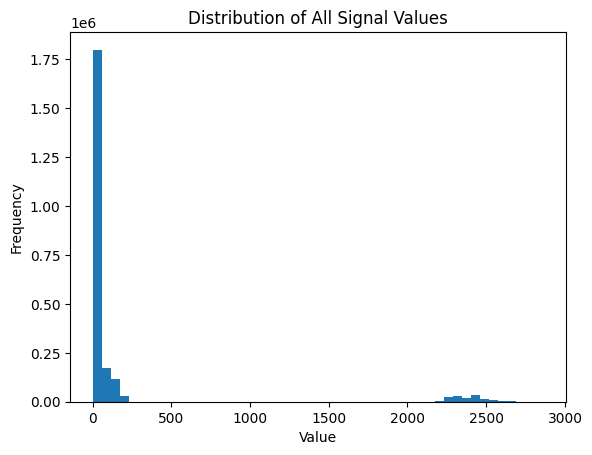

Overall min: 0.0
Overall max: 2863.6
Overall mean: 169.3598338019653
Overall std: 557.899619879862


In [29]:
import matplotlib.pyplot as plt

all_vals = df_all[signal_cols].to_numpy().ravel()

plt.figure()
plt.hist(all_vals, bins=50)
plt.title("Distribution of All Signal Values")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

print("Overall min:", np.min(all_vals))
print("Overall max:", np.max(all_vals))
print("Overall mean:", np.mean(all_vals))
print("Overall std:", np.std(all_vals))

<div style="font-family: 'Times New Roman', Times, serif; font-size: 16px; font-weight: bold; margin-top: 18px;">
2.6&nbsp;&nbsp;Example Signal Shape for a Single Cycle (t0–t59)
</div>

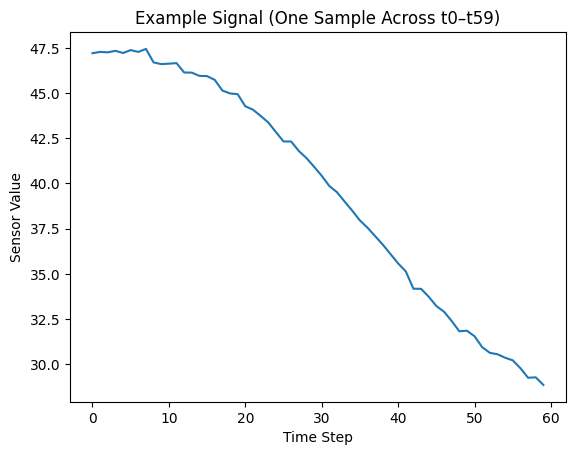

Example sample metadata: {'sensor_file': 'CE', 'sample_idx': 0}


In [30]:
# Pick one sample row to visualize
row = df_all.iloc[0][signal_cols].values

plt.figure()
plt.plot(range(60), row)
plt.title("Example Signal (One Sample Across t0–t59)")
plt.xlabel("Time Step")
plt.ylabel("Sensor Value")
plt.show()

print("Example sample metadata:", df_all.iloc[0][meta_cols].to_dict())

<div style="font-family: 'Times New Roman', Times, serif; font-size: 16px; font-weight: bold; margin-top: 18px;">
2.7&nbsp;&nbsp;Average Signal Curve by Sensor (Mean Across Cycles)
</div>

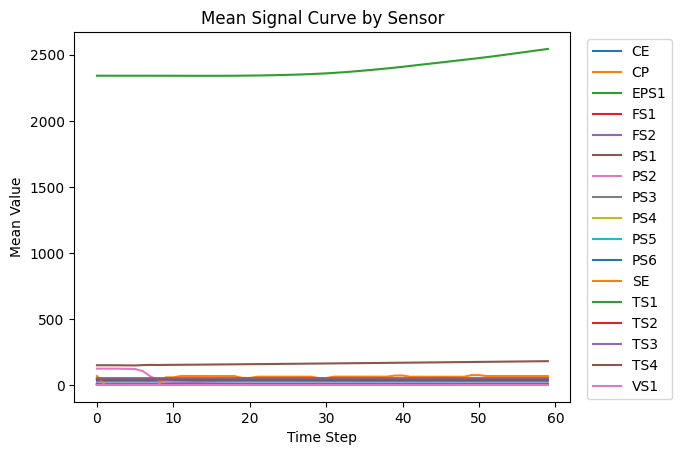

,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,...,t50,t51,t52,t53,t54,t55,t56,t57,t58,t59
sensor_file,,,,,,,,,,,,,,,,,,,,,
CE,31.325613,31.364606,31.395767,31.402451,31.395373,31.371016,31.351265,31.339065,31.307852,31.238561,...,31.087899,31.120328,31.142691,31.155982,31.152029,31.134627,31.125789,31.125212,31.145241,31.280535
CP,1.808180,1.810847,1.812283,1.813213,1.813780,1.812536,1.810481,1.809572,1.804766,1.800659,...,1.791600,1.793863,1.794836,1.795859,1.796098,1.795245,1.795064,1.795286,1.796698,1.805099
EPS1,2341.493968,2341.492971,2341.508571,2341.496054,2341.492517,2341.491429,2341.464580,2341.421406,2341.343129,2341.237551,...,2475.022222,2482.119184,2489.297596,2497.076281,2504.926984,2512.928889,2520.620499,2528.449977,2536.288073,2544.310295
FS1,8.287100,0.857298,0.563584,0.031154,0.003567,0.002926,0.002683,0.002458,0.002436,0.002311,...,0.001870,0.001835,0.001830,0.001846,0.001891,0.001807,0.001809,0.001803,0.001815,0.001798
FS2,9.651824,9.651338,9.652036,9.651336,9.651783,9.651508,9.651132,9.651566,9.651130,9.650975,...,9.652614,9.653091,9.652826,9.653782,9.654332,9.654861,9.654935,9.654814,9.654548,9.654002


In [31]:
mean_by_sensor = df_all.groupby("sensor_file")[signal_cols].mean()

plt.figure()
for sensor in mean_by_sensor.index:
    plt.plot(range(60), mean_by_sensor.loc[sensor].values, label=sensor)

plt.title("Mean Signal Curve by Sensor")
plt.xlabel("Time Step")
plt.ylabel("Mean Value")
plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left")
plt.show()

mean_by_sensor.head()


In [32]:
std_by_sensor = df_all.groupby("sensor_file")[signal_cols].std()
avg_std_by_sensor = std_by_sensor.mean(axis=1).sort_values(ascending=False)

avg_std_by_sensor

sensor_file
EPS1    79.556522
CE      11.578925
SE      10.502767
TS4      8.108144
TS1      7.992139
TS3      7.452044
TS2      7.396778
PS4      4.290799
PS1      3.992401
PS2      1.601039
PS5      0.576732
PS6      0.549969
FS2      0.450497
CP       0.278925
VS1      0.068509
PS3      0.035219
FS1      0.015380
dtype: float64

<div style="font-family: 'Times New Roman', Times, serif; font-size: 16px; font-weight: bold; margin-top: 18px;">
2.8&nbsp;&nbsp;Long-Term Trend Across Cycles
</div>
<div style="font-family: 'Times New Roman', Times, serif; font-size: 14px; margin-top: 8px;">
Each sensor records a 60-step signal per cycle. To look for gradual system changes, we track a simple cycle-level metric (mean of t0–t59) over the 2205 cycles using <code>sample_idx</code>. A smooth rolling mean helps reveal slow drift.
</div>

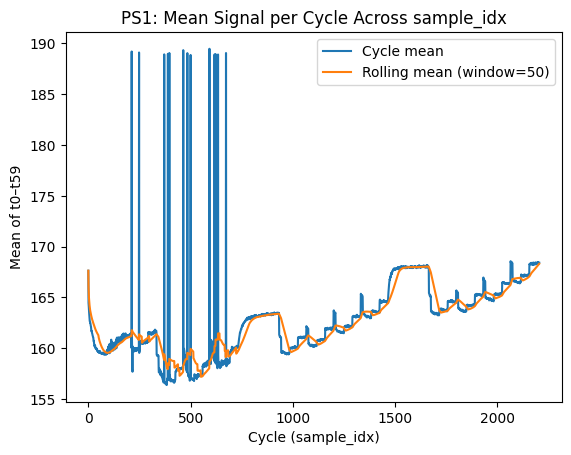

PS1 cycles: 2205


In [36]:
# 2.8 Long-Term Trend Across Cycles (example: PS1)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

signal_cols = [f"t{i}" for i in range(60)]

sensor_to_track = "PS1"  # change to TS1, TS2, etc. if desired
df_s = df_all[df_all["sensor_file"] == sensor_to_track].copy()
df_s["cycle_mean"] = df_s[signal_cols].mean(axis=1)
df_s = df_s.sort_values("sample_idx")

# Rolling mean to highlight slow drift
window = 50  # cycles
df_s["cycle_mean_roll"] = df_s["cycle_mean"].rolling(window=window, min_periods=1).mean()

plt.figure()
plt.plot(df_s["sample_idx"], df_s["cycle_mean"], label="Cycle mean")
plt.plot(df_s["sample_idx"], df_s["cycle_mean_roll"], label=f"Rolling mean (window={window})")
plt.title(f"{sensor_to_track}: Mean Signal per Cycle Across sample_idx")
plt.xlabel("Cycle (sample_idx)")
plt.ylabel("Mean of t0–t59")
plt.legend()
plt.show()

print(f"{sensor_to_track} cycles:", df_s.shape[0])

<div style="font-family: 'Times New Roman', Times, serif; font-size: 16px; font-weight: bold; margin-top: 18px;">
2.9&nbsp;&nbsp;Distributions by Sensor (Cycle-Level Summary)
</div>
<div style="font-family: 'Times New Roman', Times, serif; font-size: 14px; margin-top: 8px;">
Because sensors are measured on different scales (e.g., pressure vs temperature), it is more informative to compare distributions using a common per-cycle summary. Below, we compute the mean of t0–t59 for each row and visualize how that cycle-level metric varies by sensor.
</div>

<Figure size 1200x500 with 0 Axes>

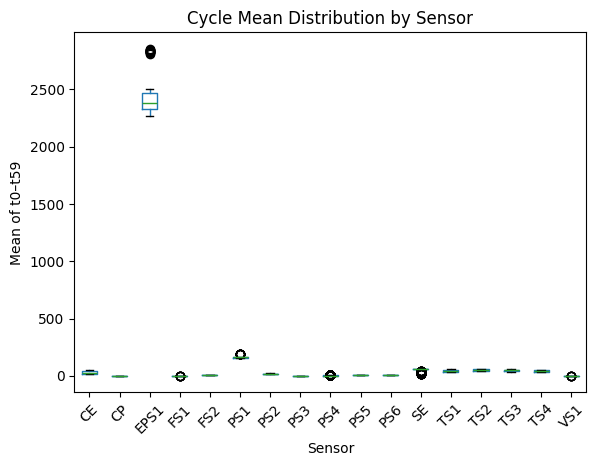

,count,mean,std,min,25%,50%,75%,max
sensor_file,,,,,,,,
CE,2205.0,31.299,11.575,17.556,20.085,27.393,46.677,47.904
CP,2205.0,1.808,0.278,1.062,1.550,1.740,2.148,2.840
EPS1,2205.0,2392.952,77.044,2271.783,2326.020,2381.923,2471.027,2855.713
FS1,2205.0,0.164,0.009,0.144,0.157,0.164,0.171,0.222
FS2,2205.0,9.651,0.450,8.863,9.201,9.691,10.158,10.405
PS1,2205.0,162.710,3.778,156.394,160.088,162.832,164.712,189.472
PS2,2205.0,19.312,1.078,16.159,18.503,19.362,20.170,21.760
PS3,2205.0,0.269,0.024,0.206,0.252,0.270,0.289,0.321
PS4,2205.0,2.611,4.290,0.000,0.000,0.000,3.871,10.212


In [37]:
# 2.9 Distributions by Sensor (cycle-level mean)
import matplotlib.pyplot as plt

signal_cols = [f"t{i}" for i in range(60)]
df_cycle = df_all.copy()
df_cycle["cycle_mean"] = df_cycle[signal_cols].mean(axis=1)

# Boxplot of cycle-level mean values by sensor
plt.figure(figsize=(12, 5))
df_cycle.boxplot(column="cycle_mean", by="sensor_file", grid=False, rot=45)
plt.title("Cycle Mean Distribution by Sensor")
plt.suptitle("")
plt.xlabel("Sensor")
plt.ylabel("Mean of t0–t59")
plt.show()

df_cycle.groupby("sensor_file")["cycle_mean"].describe().round(3)

<div style="font-family: 'Times New Roman', Times, serif; font-size: 16px; font-weight: bold; margin-top: 18px;">
2.10&nbsp;&nbsp;Sensor Correlation Analysis (Correlation Heatmap)
</div>
<div style="font-family: 'Times New Roman', Times, serif; font-size: 14px; margin-top: 8px;">
To see which sensors move together over cycles, we pivot to a wide format where each row is a cycle (<code>sample_idx</code>) and each column is a sensor’s cycle-level mean. We then compute the correlation matrix and visualize it as a heatmap.
</div>

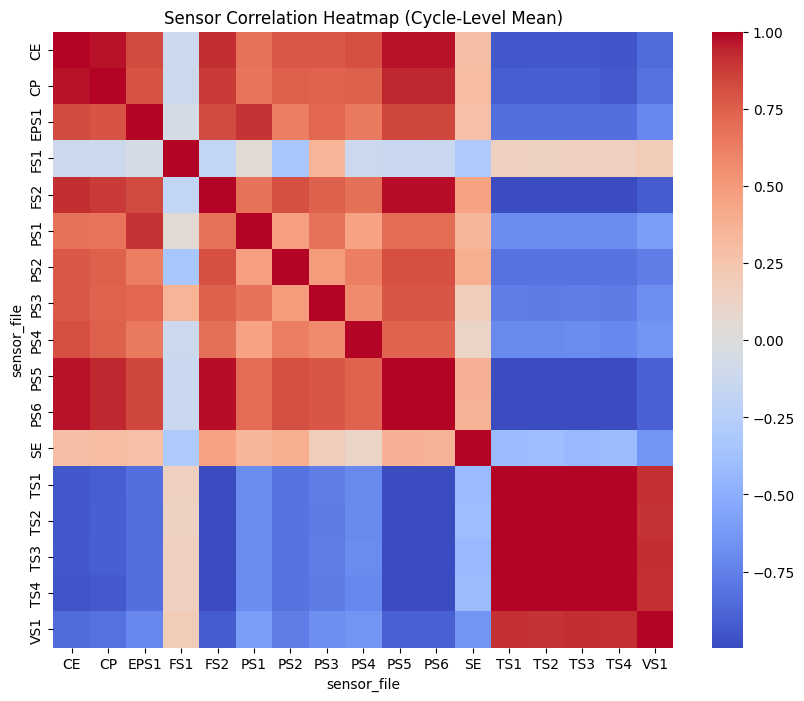

sensor_file,CE,CP,EPS1,FS1,FS2,PS1,PS2,PS3,PS4,PS5,PS6,SE,TS1,TS2,TS3,TS4,VS1
sensor_file,,,,,,,,,,,,,,,,,
CE,1.000,0.974,0.824,-0.120,0.920,0.679,0.777,0.780,0.808,0.973,0.973,0.293,-0.946,-0.946,-0.942,-0.956,-0.852
CP,0.974,1.000,0.790,-0.121,0.876,0.666,0.744,0.741,0.746,0.935,0.935,0.303,-0.912,-0.909,-0.904,-0.927,-0.821
EPS1,0.824,0.790,1.000,-0.060,0.825,0.905,0.625,0.721,0.642,0.842,0.842,0.276,-0.835,-0.838,-0.834,-0.837,-0.709
FS1,-0.120,-0.121,-0.060,1.000,-0.184,0.049,-0.335,0.360,-0.129,-0.139,-0.138,-0.304,0.157,0.148,0.163,0.158,0.190
FS2,0.920,0.876,0.825,-0.184,1.000,0.678,0.812,0.747,0.684,0.981,0.980,0.461,-0.995,-0.993,-0.996,-0.991,-0.920
PS1,0.679,0.666,0.905,0.049,0.678,1.000,0.472,0.679,0.449,0.697,0.697,0.349,-0.690,-0.688,-0.688,-0.693,-0.606
PS2,0.777,0.744,0.625,-0.335,0.812,0.472,1.000,0.487,0.621,0.809,0.809,0.389,-0.813,-0.810,-0.814,-0.814,-0.763
PS3,0.780,0.741,0.721,0.360,0.747,0.679,0.487,1.000,0.568,0.786,0.787,0.175,-0.770,-0.775,-0.766,-0.772,-0.677
PS4,0.808,0.746,0.642,-0.129,0.684,0.449,0.621,0.568,1.000,0.736,0.736,0.116,-0.700,-0.703,-0.698,-0.711,-0.650


In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 2.10 Correlation Heatmap of Sensors (based on cycle-level means)
signal_cols = [f"t{i}" for i in range(60)]

# Compute cycle-level mean per (sensor, cycle)
df_cycle = df_all.copy()
df_cycle["cycle_mean"] = df_cycle[signal_cols].mean(axis=1)

# Pivot to wide: rows = cycle, cols = sensor
wide = df_cycle.pivot_table(index="sample_idx", columns="sensor_file", values="cycle_mean", aggfunc="mean")

# Correlation between sensors across cycles
corr = wide.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=False, cmap="coolwarm", center=0)
plt.title("Sensor Correlation Heatmap (Cycle-Level Mean)")
plt.show()

corr.round(3)